# PAN card detection
This project is created to check if the pan card uploaded by user is original or fake.

Documentations-
*   skimage.metrics - https://scikit-image.org/docs/stable/api/skimage.metrics.html
*   opencv - https://docs.opencv.org/3.4/d6/d00/tutorial_py_root.html
*   PIL - https://pypi.org/project/pillow/
*   requests - https://pypi.org/project/requests/





In [1]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [2]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/images

In [3]:
#images
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
tampered = Image.open('drive/MyDrive/Projects/PAN card detector/data/tampered.png')

In [4]:
#format of images
print(f"Original image format: {original.format}")
print(f"Tampered image format: {tampered.format}")

Original image format: JPEG
Tampered image format: PNG


In [5]:
#size of images in pixels
print(f"Original image size: {original.size}")
print(f"Tampered image size: {tampered.size}")

Original image size: (1200, 800)
Tampered image size: (250, 160)


In [6]:
#convert the format and size of images to identical
original = original.resize((250,160))
print(original.size)
original.save('pan_card_tampering/images/original.png')

tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('pan_card_tampering/images/tampered.png')

(250, 160)
(250, 160)


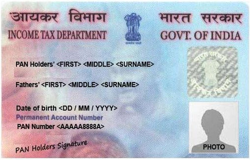

In [7]:
original

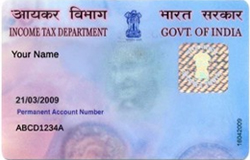

In [8]:
tampered

In [9]:
#load the input images
original = cv2.imread('pan_card_tampering/images/original.png')
tampered = cv2.imread('pan_card_tampering/images/tampered.png')

# convert images to grayscale
It is necessary to convert as coloured images are harder for the machine to compare because coloured images have 3 channels whereas grayscale images have only 1 channel.

In [10]:
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

# Structural similarity index
It helps to determine exactly where in terms of x,y coordinates the images differ.

Here we are finding similarity, so lower the index score lower the similarity.

More info for SSIM on - https://medium.com/srm-mic/all-about-structural-similarity-index-ssim-theory-code-in-pytorch-6551b455541e

In [11]:
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("Index: {}".format(score))

Index: 0.31028556418525766


#Calculating threshold
Using the threshold function of computer vision which applies an adaptive threshold to the image which is stored in array form.

This function transforms grayscale image to binary image using mathematical formula

More info for threshold on - https://www.geeksforgeeks.org/matlab-converting-a-grayscale-image-to-binary-image-using-thresholding/

In [12]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# Calculating contours
Contours are useful for shape analysis and recognition.

More info on contours - https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html

In [13]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  #findContours works on binary image and retrieves contours
cnts = imutils.grab_contours(cnts)  #grab_contours grabs the appropirate value of contours

In [14]:
#loop over the contours and apply them on image
for c in cnts:
  (x,y,w,h) = cv2.boundingRect(c)
  cv2.rectangle(original, (x,y), (x+w, y+h), (0,0,255), 2)
  cv2.rectangle(tampered, (x,y), (x+w, y+h), (0,0,255), 2)

'''The bounding rectangle finds ratio of width to height of bounding rectangle of object. Compute bounding box of contour
   then draw bounding boxes on both input images to represent where the images are different.'''

Original image


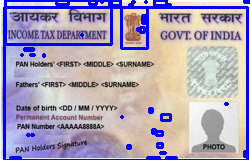

In [15]:
#Display the images with contours
print('Original image')
Image.fromarray(original)

Tampered image


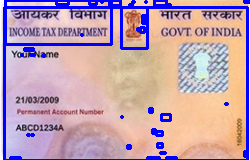

In [16]:
print ('Tampered image')
Image.fromarray(tampered)

# Display the difference image with black

Different image


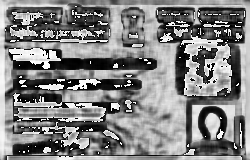

In [17]:
print('Different image')
Image.fromarray(diff)
# The black portion on the image shows the difference between the input images

# Display the threshold with white

Threshold image


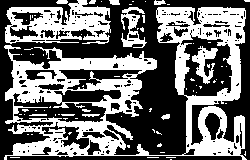

In [18]:
print('Threshold image')
Image.fromarray(thresh)
# The white portion on the image shows the threshold difference between the input images

Due to the low SSIM score and much differences in the black and white images, we can say that the image in the tampered variable is actually tampered